In [173]:
from waterlevels_oker import utils
from waterlevels_oker.data import preprocess_weather_data
import pandas as pd
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format = "retina"

# Import & Cleaning

In [96]:
measurements_2019 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2019",
	header=[0, 1],
)

In [97]:
measurements_2019

2019              Datum  ...      Wetter      
    Unnamed: 0_level_1 Unnamed: 1_level_1  ... Niederschl. Temp.
0                  Di.         2019-01-01  ...         2.6   7.0
1                   Mi         2019-01-02  ...         0.0   2.0
2                   Do         2019-01-03  ...         0.0  -5.0
3                   Fr         2019-01-04  ...         0.9   2.0
4                   Sa         2019-01-05  ...         5.0   5.0
..                 ...                ...  ...         ...   ...
360                 Fr         2019-12-27  ...         0.3   1.0
361                 Sa         2019-12-28  ...         0.0  -3.0
362                 So         2019-12-29  ...         0.0  -4.0
363                 Mo         2019-12-30  ...         0.0   1.0
364                 Di         2019-12-31  ...         0.2   2.0

[365 rows x 22 columns]

In [98]:
measurements_2019.columns

MultiIndex([(                2019, 'Unnamed: 0_level_1'),
            (             'Datum', 'Unnamed: 1_level_1'),
            (     'Okertalsperre',           'Füll (%)'),
            (     'Okertalsperre',        'Abg. (m³/s)'),
            (          'Schladen',                  'm'),
            (          'Schladen',                88.72),
            (             'Ohrum',                  'm'),
            (             'Ohrum',                75.54),
            (             'Ohrum',               'm³/s'),
            (          'sensoweb',         'Schäferbr.'),
            (          'sensoweb',           'Rüningen'),
            (          'sensoweb',               'DLRG'),
            ('Eisenbütteler Wehr',                 'OW'),
            (         'Petriwehr',                 'OW'),
            (        'Wendenwehr',                 'OW'),
            (        'Tel.: 2511',                'HKW'),
            (        'Ölper Wehr',                 'OW'),
            ( 

In [41]:
cols_to_drop = {
	year: [
		(year, "Unnamed: 0_level_1"),
		("Schladen", "m"),
		# ("Schladen", 88.72),
		("Ohrum", "m"),
		# ("Ohrum", 75.54),
		# ("Ohrum", "m³/s"),
		# ("sensoweb", "Schäferbr."),
		# ("sensoweb", "Rüningen"),
		# ("sensoweb", "DLRG"),
		("Tel.: 2511", "HKW"),
		("Groß Schwülper", "m"),
		("Groß Schwülper", 55.99),
		("Wetter", "Niederschl."),
		("Wetter", "Temp."),
	]
	for year in [2019, 2020, 2021, 2022, 2023]
}

In [42]:
measurements_2019 = measurements_2019.drop(columns=cols_to_drop[2019])
measurements_2019

Datum Okertalsperre  ... Ölper Wehr          
    Unnamed: 1_level_1      Füll (%)  ...         OW Veltenhof
0           2019-01-01          37.0  ...      66.60     64.04
1           2019-01-02          38.0  ...      66.60     64.02
2           2019-01-03          38.0  ...      66.59     64.03
3           2019-01-04          39.0  ...      66.57     63.97
4           2019-01-05          39.0  ...      66.59     63.97
..                 ...           ...  ...        ...       ...
360         2019-12-27          33.0  ...      66.55     63.94
361         2019-12-28          34.0  ...      66.55     63.85
362         2019-12-29          34.0  ...      66.54     63.85
363         2019-12-30          35.0  ...      66.54     63.81
364         2019-12-31          35.0  ...      66.56     63.79

[365 rows x 14 columns]

In [43]:
measurements_2019.columns = measurements_2019.columns.to_flat_index()
measurements_2019 = measurements_2019.rename(
	columns={measurements_2019.columns[0]: "date"}
)
measurements_2019

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(sensoweb, Schäferbr.)","(sensoweb, Rüningen)","(sensoweb, DLRG)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2019-01-01,37.0,1.40,89.44,76.83,4.5,72.45,71.62,70.75,70.75,69.21,69.24,66.60,64.04
1,2019-01-02,38.0,1.40,89.45,76.90,5.0,72.51,71.62,70.76,70.75,69.27,69.27,66.60,64.02
2,2019-01-03,38.0,1.40,89.44,76.76,4.0,72.46,71.60,70.74,70.73,69.30,69.33,66.59,64.03
3,2019-01-04,39.0,1.40,89.44,76.73,3.7,72.43,71.61,70.75,70.75,69.20,69.22,66.57,63.97
4,2019-01-05,39.0,1.36,89.52,76.85,4.5,72.43,71.62,70.78,70.75,69.34,69.38,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,33.0,1.30,89.40,76.75,3.9,72.41,71.61,70.75,70.73,69.42,69.45,66.55,63.94
361,2019-12-28,34.0,1.30,89.40,76.72,3.6,72.39,71.61,70.73,70.72,69.40,69.42,66.55,63.85
362,2019-12-29,34.0,1.30,89.41,76.71,3.6,72.39,71.61,70.73,70.68,69.39,69.40,66.54,63.85
363,2019-12-30,35.0,1.30,89.40,76.69,3.5,72.39,71.62,NaN,70.69,69.38,69.39,66.54,63.81


In [44]:
measurements_2020 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2020",
	header=[0, 1],
)

In [45]:
measurements_2020 = measurements_2020.drop(columns=cols_to_drop[2020]).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2020

2020 Okertalsperre  ... Ölper Wehr          
    Unnamed: 1_level_1      Füll (%)  ...         OW Veltenhof
0           2020-01-01            35  ...      66.56     63.77
1           2020-01-02            35  ...      66.55     63.77
2           2020-01-03            35  ...      66.55     63.78
3           2020-01-04            35  ...      66.56     63.78
4           2020-01-05            35  ...      66.56     63.93
..                 ...           ...  ...        ...       ...
361         2020-12-27            30  ...      66.48     63.74
362         2020-12-28            30  ...      66.50     63.70
363         2020-12-29            30  ...      66.49     63.64
364         2020-12-30            30  ...      66.51     63.60
365         2020-12-31            30  ...      66.49     63.65

[366 rows x 14 columns]

In [46]:
measurements_2020.columns = measurements_2020.columns.to_flat_index()
measurements_2020 = measurements_2020.rename(
	columns={measurements_2020.columns[0]: "date"}
)
measurements_2020

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(sensoweb, Schäferbr.)","(sensoweb, Rüningen)","(sensoweb, DLRG)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2020-01-01,35,1.3,89.40,76.68,3.5,72.39,71.61,70.72,70.71,69.36,69.37,66.56,63.77
1,2020-01-02,35,1.3,89.40,76.67,3.4,72.41,71.61,70.71,70.70,69.36,69.37,66.55,63.77
2,2020-01-03,35,1.3,89.40,76.68,3.5,72.39,71.62,70.71,70.71,69.34,69.35,66.55,63.78
3,2020-01-04,35,1.3,89.41,76.72,3.7,72.39,71.66,70.72,70.71,69.35,69.36,66.56,63.78
4,2020-01-05,35,1.3,89.44,76.83,4.4,72.47,71.68,70.76,70.75,69.44,69.46,66.56,63.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,30,1.3,89.40,76.54,2.6,72.38,71.70,70.77,70.75,-,68.83,66.48,63.74
362,2020-12-28,30,1.3,89.39,76.55,2.6,72.38,71.71,70.77,70.75,-,68.79,66.50,63.70
363,2020-12-29,30,1.3,89.39,76.64,3.2,72.38,71.71,70.80,70.77,-,68.77,66.49,63.64
364,2020-12-30,30,1.3,89.39,76.60,2.9,72.38,71.71,70.77,70.75,-,68.80,66.51,63.60


In [47]:
measurements_2021 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2021",
	header=[1, 2],
)
measurements_2021

2021                     ...      Wetter      
    Unnamed: 0_level_1 Unnamed: 1_level_1  ... Niederschl. Temp.
0                   Fr         2021-01-01  ...         0.0   0.0
1                   Sa         2021-01-02  ...         0.0   1.0
2                   So         2021-01-03  ...         6.4   1.0
3                   Mo         2021-01-04  ...         2.1   1.0
4                   Di         2021-01-05  ...         2.0   1.0
..                 ...                ...  ...         ...   ...
360                 Mo         2021-12-27  ...         0.2  -3.0
361                 Di         2021-12-28  ...         3.7   5.0
362                 Mi         2021-12-29  ...         2.8   4.0
363                 Do         2021-12-30  ...         2.7   9.0
364                 Fr         2021-12-31  ...         0.5  13.0

[365 rows x 23 columns]

In [48]:
measurements_2021 = measurements_2021.drop(columns=cols_to_drop[2021]).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2021

2021 Okertalsperre  ... Ölper Wehr          
    Unnamed: 1_level_1      Füll (%)  ...         OW Veltenhof
0           2021-01-01            30  ...      69.49     63.65
1           2021-01-02            29  ...      66.49     63.64
2           2021-01-03            30  ...      66.49     63.64
3           2021-01-04            29  ...      66.51     63.70
4           2021-01-05            29  ...      66.50     63.72
..                 ...           ...  ...        ...       ...
360         2021-12-27            36  ...      66.55     63.90
361         2021-12-28            36  ...      66.57     63.76
362         2021-12-29            36  ...      66.54     63.88
363         2021-12-30            36  ...      66.53     63.94
364         2021-12-31            37  ...      66.56     63.93

[365 rows x 14 columns]

In [49]:
measurements_2021.columns = measurements_2021.columns.to_flat_index()
measurements_2021 = measurements_2021.rename(
	columns={measurements_2021.columns[0]: "date"}
)
measurements_2021

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(sensoweb, Schäferbr.)","(sensoweb, Rüningen)","(sensoweb, DLRG)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2021-01-01,30,1.3,89.38,76.57,2.8,72.38,71.71,70.78,70.75,NaN,68.77,69.49,63.65
1,2021-01-02,29,1.3,89.38,76.55,2.6,72.38,71.71,70.79,70.74,NaN,68.76,66.49,63.64
2,2021-01-03,30,1.3,89.39,76.59,3.0,72.38,71.71,70.79,70.76,NaN,68.75,66.49,63.64
3,2021-01-04,29,1.3,89.40,76.63,3.1,72.38,71.71,70.80,70.76,NaN,68.84,66.51,63.70
4,2021-01-05,29,1.3,89.39,76.61,3.0,72.38,71.72,70.78,70.75,NaN,68.92,66.50,63.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,36,1.3,89.43,76.71,3.6,72.41,71.73,70.82,70.72,68.93,68.97,66.55,63.90
361,2021-12-28,36,1.3,89.44,76.73,3.7,72.44,71.73,70.82,70.71,69.22,69.25,66.57,63.76
362,2021-12-29,36,1.3,89.44,76.74,3.8,72.46,71.73,70.86,70.75,69.23,69.26,66.54,63.88
363,2021-12-30,36,1.3,89.44,76.75,3.8,72.45,71.71,70.91,70.80,69.14,69.16,66.53,63.94


In [50]:
measurements_2022 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2022",
	header=[0, 1],
)
measurements_2022

2022                       ... Groß Schwülper      Wetter      
    Uhrzeit Uhrzeit.1  Uhrzeit.2  ...          55.99 Niederschl. Temp.
0       NaN        Sa 2022-01-01  ...          58.54         0.0  13.0
1       NaN        So 2022-01-02  ...          58.50         0.1  11.0
2      Kw.1        Mo 2022-01-03  ...          58.44         0.9  10.0
3       NaN        Di 2022-01-04  ...          58.41         0.3   7.0
4       NaN        Mi 2022-01-05  ...          58.43         6.3   3.0
..      ...       ...        ...  ...            ...         ...   ...
360    KW52        Di 2022-12-27  ...          58.66         1.0   1.0
361     NaN        Mi 2022-12-28  ...          58.55         0.1   3.0
362     NaN        Do 2022-12-29  ...          58.37         0.2   8.0
363     NaN        Fr 2022-12-30  ...          58.36         0.0   5.0
364     NaN        Sa 2022-12-31  ...          58.38         5.5  10.0

[365 rows x 28 columns]

In [51]:
cols_to_drop_2022 = [
	(2022, "Uhrzeit"),
	(2022, "Uhrzeit.1"),
	("Schladen", "m"),
	# ("Schladen", 88.72),
	("Ohrum", "m"),
	# ("Ohrum", 75.54),
	# ("Ohrum", "m³/s"),
	# ("sensoweb", "Schäferbr."),
	# ("sensoweb", "Rüningen"),
	# ("sensoweb", "DLRG"),
	("Groß Schwülper", "m"),
	("Groß Schwülper", 55.99),
	("Wetter", "Niederschl."),
	("Wetter", "Temp."),
	("Eisenbütteler Wehr", "UW"),
	("Eisenbütteler Wehr", "m³/s"),
	("Eisenbütteler Wehr", "Kalenwall"),
	("Petriwehr", "UW"),
	("Tel.: 2511", "HKW"),
	("Wendenwehr", "UW"),
]

In [52]:
measurements_2022 = measurements_2022.drop(columns=cols_to_drop_2022)
measurements_2022

2022 Okertalsperre              ... Wendenwehr Ölper Wehr          
     Uhrzeit.2      Füll (%) Abg. (m³/s)  ...         OW         OW Veltenhof
0   2022-01-01            38         1.3  ...      69.24      66.57     63.93
1   2022-01-02            38         1.3  ...      69.15      66.56     63.93
2   2022-01-03            39         1.3  ...      69.16      66.55     63.89
3   2022-01-04            40         1.3  ...      69.25      66.55     63.87
4   2022-01-05            40         1.3  ...      69.28      66.56     63.98
..         ...           ...         ...  ...        ...        ...       ...
360 2022-12-27            25         1.1  ...      69.35      66.46     64.04
361 2022-12-28            26         1.3  ...      69.33      66.50     63.93
362 2022-12-29            27         1.3  ...      69.35      66.49     63.78
363 2022-12-30            27         1.3  ...      69.34      66.50     63.80
364 2022-12-31            28         1.3  ...      69.37      66.51     63.86

[365 rows x 14 columns]

In [53]:
measurements_2022.columns = measurements_2022.columns.to_flat_index()
measurements_2022 = measurements_2022.rename(
	columns={measurements_2022.columns[0]: "date"}
)
measurements_2022

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(sensoweb, Schäferbr.)","(sensoweb, Rüningen)","(sensoweb, DLRG)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2022-01-01,38,1.3,89.44,76.79,4.20,72.48,71.71,70.91,70.80,69.22,69.24,66.57,63.93
1,2022-01-02,38,1.3,89.44,76.73,3.70,72.44,71.73,70.88,70.79,69.14,69.15,66.56,63.93
2,2022-01-03,39,1.3,89.46,76.79,4.20,72.48,71.72,70.84,70.74,69.15,69.16,66.55,63.89
3,2022-01-04,40,1.3,89.46,76.79,4.20,72.49,71.73,70.87,70.80,69.23,69.25,66.55,63.87
4,2022-01-05,40,1.3,89.47,76.81,4.32,72.50,71.72,70.84,70.73,69.24,69.28,66.56,63.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,25,1.1,89.45,76.89,4.90,72.59,71.71,70.94,70.84,69.30,69.35,66.46,64.04
361,2022-12-28,26,1.3,89.44,76.67,3.30,72.47,71.72,70.89,70.79,69.30,69.33,66.50,63.93
362,2022-12-29,27,1.3,89.42,76.66,3.30,72.41,71.71,70.90,70.81,69.30,69.35,66.49,63.78
363,2022-12-30,27,1.3,89.42,76.70,3.60,72.42,71.72,70.90,70.81,69.30,69.34,66.50,63.80


In [54]:
measurements_2023 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2023",
	header=[0, 1],
)
measurements_2023

2023                       ... Groß Schwülper      Wetter      
    Uhrzeit Uhrzeit.1  Uhrzeit.2  ...          55.99 Niederschl. Temp.
0       NaN        So 2023-01-01  ...          58.37         0.2    11
1      Kw.1        Mo 2023-01-02  ...          58.36         0.6    10
2       NaN        Di 2023-01-03  ...          58.26         0.2     5
3       NaN        Mi 2023-01-04  ...          58.26         3.9     7
4       NaN        Do 2023-01-05  ...          58.29        10.0    10
..      ...       ...        ...  ...            ...         ...   ...
360     NaN        Mi 2023-12-27  ...          61.48         0.0     6
361     NaN        Do 2023-12-28  ...          61.41         0.0     7
362     NaN        Fr 2023-12-29  ...          61.24         5.6     6
363     NaN        Sa 2023-12-30  ...          61.10         0.7     6
364     NaN        So 2023-12-31  ...          61.00         0.0     4

[365 rows x 26 columns]

In [55]:
cols_to_drop_2023 = [
	(2023, "Uhrzeit"),
	(2023, "Uhrzeit.1"),
	("Schladen", "m"),
	# ("Schladen", 88.72),
	("Ohrum", "m"),
	# ("Ohrum", 75.54),
	# ("Ohrum", "m³/s"),
	# ("sensoweb", "Schäferbr."),
	# ("sensoweb", "Rüningen"),
	# ("sensoweb", "DLRG"),
	("Groß Schwülper", "m"),
	("Groß Schwülper", 55.99),
	("Wetter", "Niederschl."),
	("Wetter", "Temp."),
	("Tel.: 2511", "HKW"),
	("Eisenbütteler Wehr", "m³/s"),
	("Eisenbütteler Wehr", "Kalenwall"),
]

In [56]:
measurements_2023 = measurements_2023.drop(columns=cols_to_drop_2023).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2023

2023 Okertalsperre  ... Ölper Wehr           Veltenhof
     Uhrzeit.2      Füll (%)  ...         OW Unnamed: 21_level_1
0   2023-01-01            28  ...      66.51               63.77
1   2023-01-02            28  ...      66.51               63.75
2   2023-01-03            29  ...      66.50               63.74
3   2023-01-04            29  ...      66.49               63.71
4   2023-01-05            30  ...      66.51               63.79
..         ...           ...  ...        ...                 ...
360 2023-12-27           101  ...      67.85               66.16
361 2023-12-28          99.7  ...      67.84               66.15
362 2023-12-29          97.4  ...      67.77               66.10
363 2023-12-30          95.4  ...      67.76               66.05
364 2023-12-31          93.9  ...      67.74               66.02

[365 rows x 14 columns]

In [57]:
measurements_2023.columns = measurements_2023.columns.to_flat_index()
measurements_2023 = measurements_2023.rename(
	columns={
		measurements_2023.columns[0]: "date",
		measurements_2023.columns[-1]: ("Ölper Wehr", "Veltenhof"),
	}
)
measurements_2023

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(sensoweb, Schäferbr.)","(sensoweb, Rüningen)","(sensoweb, DLRG)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2023-01-01,28,1.3,89.40,76.64,3.2,72.4,71.71,70.88,70.79,69.30,69.34,66.51,63.77
1,2023-01-02,28,1.3,89.40,76.41,2.0,72.4,71.71,70.88,70.79,69.30,69.34,66.51,63.75
2,2023-01-03,29,1.3,89.42,76.57,2.7,72.4,71.71,70.86,70.78,69.30,69.33,66.50,63.74
3,2023-01-04,29,1.3,89.40,76.52,2.5,72.4,71.71,70.9,70.81,69.30,69.34,66.49,63.71
4,2023-01-05,30,1.3,89.45,76.70,3.5,72.43,71.71,70.91,70.80,69.30,69.37,66.51,63.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,101,20.6,91.57,79.87,NaN,75.22,72.6,-,71.06,69.04,68.75,67.85,66.16
361,2023-12-28,99.7,21.8,91.29,79.83,NaN,75.21,72.55,-,71.07,68.99,68.67,67.84,66.15
362,2023-12-29,97.4,22,91.24,79.75,NaN,75.15,72.42,-,70.72,68.72,68.42,67.77,66.10
363,2023-12-30,95.4,20.5,91.31,79.71,NaN,75.13,72.38,-,70.60,68.65,68.27,67.76,66.05


# Merge into one measurement dataset

In [69]:
all_measurements = pd.concat(
	[
		measurements_2019,
		measurements_2020,
		measurements_2021,
		measurements_2022,
		measurements_2023,
	]
).set_index("date")
all_measurements

,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(sensoweb, Schäferbr.)","(sensoweb, Rüningen)","(sensoweb, DLRG)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
date,,,,,,,,,,,,,
2019-01-01,37.0,1.4,89.44,76.83,4.5,72.45,71.62,70.75,70.75,69.21,69.24,66.60,64.04
2019-01-02,38.0,1.4,89.45,76.90,5.0,72.51,71.62,70.76,70.75,69.27,69.27,66.60,64.02
2019-01-03,38.0,1.4,89.44,76.76,4.0,72.46,71.6,70.74,70.73,69.3,69.33,66.59,64.03
2019-01-04,39.0,1.4,89.44,76.73,3.7,72.43,71.61,70.75,70.75,69.2,69.22,66.57,63.97
2019-01-05,39.0,1.36,89.52,76.85,4.5,72.43,71.62,70.78,70.75,69.34,69.38,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,101,20.6,91.57,79.87,NaN,75.22,72.6,-,71.06,69.04,68.75,67.85,66.16
2023-12-28,99.7,21.8,91.29,79.83,NaN,75.21,72.55,-,71.07,68.99,68.67,67.84,66.15
2023-12-29,97.4,22,91.24,79.75,NaN,75.15,72.42,-,70.72,68.72,68.42,67.77,66.10


In [70]:
all_measurements = all_measurements.replace("-", np.NaN).dropna()
all_measurements

/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_56311/2660179119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_measurements = all_measurements.replace("-", np.NaN).dropna()


,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(sensoweb, Schäferbr.)","(sensoweb, Rüningen)","(sensoweb, DLRG)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
date,,,,,,,,,,,,,
2019-01-01,37.0,1.40,89.44,76.83,4.50,72.45,71.62,70.75,70.75,69.21,69.24,66.60,64.04
2019-01-02,38.0,1.40,89.45,76.90,5.00,72.51,71.62,70.76,70.75,69.27,69.27,66.60,64.02
2019-01-03,38.0,1.40,89.44,76.76,4.00,72.46,71.6,70.74,70.73,69.30,69.33,66.59,64.03
2019-01-04,39.0,1.40,89.44,76.73,3.70,72.43,71.61,70.75,70.75,69.20,69.22,66.57,63.97
2019-01-05,39.0,1.36,89.52,76.85,4.50,72.43,71.62,70.78,70.75,69.34,69.38,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-21,58.0,1.30,89.56,77.31,8.50,72.83,71.49,70.7,70.61,69.30,69.33,66.50,64.52
2023-10-22,58.0,1.30,89.51,77.10,6.60,72.64,71.5,70.69,70.64,69.30,69.32,66.48,64.46
2023-10-23,58.0,1.30,89.50,76.99,5.70,72.52,71.51,70.68,70.64,69.30,69.32,66.50,64.26


In [72]:
all_measurements.columns

Index([   ('Okertalsperre', 'Füll (%)'), ('Okertalsperre', 'Abg. (m³/s)'),
                    ('Schladen', 88.72),                 ('Ohrum', 75.54),
                      ('Ohrum', 'm³/s'),       ('sensoweb', 'Schäferbr.'),
               ('sensoweb', 'Rüningen'),             ('sensoweb', 'DLRG'),
           ('Eisenbütteler Wehr', 'OW'),              ('Petriwehr', 'OW'),
                   ('Wendenwehr', 'OW'),             ('Ölper Wehr', 'OW'),
            ('Ölper Wehr', 'Veltenhof')],
      dtype='object')

In [73]:
all_measurements = all_measurements[
	[
		("Schladen", 88.72),
		("Ohrum", 75.54),
		("Ohrum", "m³/s"),
		("sensoweb", "Schäferbr."),
		("Eisenbütteler Wehr", "OW"),
		("Petriwehr", "OW"),
		("Wendenwehr", "OW"),
	]
]
all_measurements = all_measurements.rename(
	columns={
		("Schladen", 88.72): "schladen",
		("Ohrum", 75.54): "ohrum_level",
		("Ohrum", "m³/s"): "ohrum_flow",
		("sensoweb", "Schäferbr."): "schaeferbridge",
		("Eisenbütteler Wehr", "OW"): "eisenbuetteler_wehr",
		("Petriwehr", "OW"): "petriwehr",
		("Wendenwehr", "OW"): "wendenwehr",
	}
)
all_measurements

,okertal_fill_perc,okertal_output,schladen,ohrum_level,ohrum_flow,schaeferbridge,rueningen,dlrg,eisenbuetteler_wehr,petriwehr,wendenwehr,oelper_wehr,oelper_wehr_2
date,,,,,,,,,,,,,
2019-01-01,37.0,1.40,89.44,76.83,4.50,72.45,71.62,70.75,70.75,69.21,69.24,66.60,64.04
2019-01-02,38.0,1.40,89.45,76.90,5.00,72.51,71.62,70.76,70.75,69.27,69.27,66.60,64.02
2019-01-03,38.0,1.40,89.44,76.76,4.00,72.46,71.6,70.74,70.73,69.30,69.33,66.59,64.03
2019-01-04,39.0,1.40,89.44,76.73,3.70,72.43,71.61,70.75,70.75,69.20,69.22,66.57,63.97
2019-01-05,39.0,1.36,89.52,76.85,4.50,72.43,71.62,70.78,70.75,69.34,69.38,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-21,58.0,1.30,89.56,77.31,8.50,72.83,71.49,70.7,70.61,69.30,69.33,66.50,64.52
2023-10-22,58.0,1.30,89.51,77.10,6.60,72.64,71.5,70.69,70.64,69.30,69.32,66.48,64.46
2023-10-23,58.0,1.30,89.50,76.99,5.70,72.52,71.51,70.68,70.64,69.30,69.32,66.50,64.26


In [74]:
all_measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1358 entries, 2019-01-01 to 2023-10-25
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   okertal_fill_perc    1358 non-null   float64
 1   okertal_output       1358 non-null   float64
 2   schladen             1358 non-null   float64
 3   ohrum_level          1358 non-null   float64
 4   ohrum_flow           1358 non-null   float64
 5   schaeferbridge       1358 non-null   float64
 6   rueningen            1358 non-null   object 
 7   dlrg                 1358 non-null   object 
 8   eisenbuetteler_wehr  1358 non-null   float64
 9   petriwehr            1358 non-null   float64
 10  wendenwehr           1358 non-null   float64
 11  oelper_wehr          1358 non-null   float64
 12  oelper_wehr_2        1358 non-null   float64
dtypes: float64(11), object(2)
memory usage: 148.5+ KB


In [82]:
all_measurements = all_measurements.assign(
	rueningen=lambda _df: _df["rueningen"].replace("71/72", 71.5),
	dlrg=lambda _df: _df["dlrg"].astype("float"),
)

In [83]:
all_measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1358 entries, 2019-01-01 to 2023-10-25
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   okertal_fill_perc    1358 non-null   float64
 1   okertal_output       1358 non-null   float64
 2   schladen             1358 non-null   float64
 3   ohrum_level          1358 non-null   float64
 4   ohrum_flow           1358 non-null   float64
 5   schaeferbridge       1358 non-null   float64
 6   rueningen            1358 non-null   float64
 7   dlrg                 1358 non-null   float64
 8   eisenbuetteler_wehr  1358 non-null   float64
 9   petriwehr            1358 non-null   float64
 10  wendenwehr           1358 non-null   float64
 11  oelper_wehr          1358 non-null   float64
 12  oelper_wehr_2        1358 non-null   float64
dtypes: float64(13)
memory usage: 148.5 KB


# Get weather data and join

In [84]:
weather_data = preprocess_weather_data()

In [85]:
daily_weather_data = weather_data.groupby(weather_data.index.date).mean()
daily_weather_data

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar
2010-01-01,0.026087,999.539130,0.000000,-2.000000,95.217391,12.578261,97.260870,-3.826087,87.304348,16134.782609,109.130435,19.626087,0.018478
2010-01-02,0.147826,1013.982609,0.000000,-3.573913,263.043478,10.639130,94.913043,-4.700000,91.956522,3752.173913,266.086957,16.400000,0.021652
2010-01-03,0.095455,1019.768182,0.000000,-4.604545,49.545455,10.009091,98.818182,-5.781818,91.318182,5863.636364,61.818182,15.518182,0.021000
2010-01-04,0.000000,1016.766667,10.416667,-5.462500,240.000000,10.662500,82.291667,-7.687500,84.375000,11916.666667,233.750000,18.654167,0.039542
2010-01-05,0.000000,1008.087500,6.500000,-5.525000,192.083333,11.062500,60.875000,-8.137500,82.166667,13375.000000,190.833333,19.058333,0.037125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-27,0.708333,1014.000000,1.166667,18.870833,94.166667,7.262500,97.833333,16.483333,86.416667,30292.916667,99.583333,13.937500,0.127000
2024-07-28,0.450000,1022.033333,25.291667,18.145833,296.666667,12.058333,55.541667,13.579167,76.208333,49793.333333,287.083333,22.458333,0.250208
2024-07-29,0.000000,1024.644583,37.208333,17.912500,165.833333,5.583333,3.625000,10.412500,65.291667,60822.083333,150.000000,11.683333,0.314542
2024-07-30,0.000000,1017.733333,36.666667,21.650000,195.416667,6.158333,24.916667,12.712500,59.583333,61507.083333,185.000000,13.350000,0.304875


In [86]:
data_full = daily_weather_data.join(all_measurements, how="inner")
data_full

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar,okertal_fill_perc,okertal_output,schladen,ohrum_level,ohrum_flow,schaeferbridge,rueningen,dlrg,eisenbuetteler_wehr,petriwehr,wendenwehr,oelper_wehr,oelper_wehr_2
2019-01-01,0.058333,1021.962500,0.875000,6.250000,277.916667,28.220833,86.166667,3.387500,82.083333,21237.083333,279.583333,51.179167,0.015208,37.0,1.40,89.44,76.83,4.50,72.45,71.62,70.75,70.75,69.21,69.24,66.60,64.04
2019-01-02,0.000000,1029.574167,13.041667,2.420833,308.333333,21.941667,37.333333,-2.795833,69.041667,43075.416667,300.000000,35.795833,0.043208,38.0,1.40,89.45,76.90,5.00,72.51,71.62,70.76,70.75,69.27,69.27,66.60,64.02
2019-01-03,0.000000,1036.089167,7.791667,-0.287500,275.833333,9.320833,51.541667,-2.504167,85.166667,32230.000000,277.500000,14.866667,0.034583,38.0,1.40,89.44,76.76,4.00,72.46,71.60,70.74,70.73,69.30,69.33,66.59,64.03
2019-01-04,0.004167,1031.060000,0.000000,2.587500,270.000000,17.945833,94.041667,1.558333,92.750000,9067.083333,265.416667,30.662500,0.007333,39.0,1.40,89.44,76.73,3.70,72.43,71.61,70.75,70.75,69.20,69.22,66.57,63.97
2019-01-05,0.158333,1023.469583,0.000000,6.958333,305.416667,20.158333,94.041667,6.120833,94.375000,21300.833333,300.833333,33.300000,0.013167,39.0,1.36,89.52,76.85,4.50,72.43,71.62,70.78,70.75,69.34,69.38,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-21,0.100000,996.054167,13.416667,11.783333,161.666667,12.141667,58.708333,9.408333,86.458333,39839.166667,165.000000,22.650000,0.083333,58.0,1.30,89.56,77.31,8.50,72.83,71.49,70.70,70.61,69.30,69.33,66.50,64.52
2023-10-22,0.000000,1007.566667,5.750000,11.808333,197.083333,11.920833,67.583333,8.258333,79.416667,66032.500000,200.000000,22.804167,0.060125,58.0,1.30,89.51,77.10,6.60,72.64,71.50,70.69,70.64,69.30,69.32,66.48,64.46
2023-10-23,0.000000,1013.204167,11.583333,11.800000,183.333333,7.829167,78.833333,9.825000,88.291667,38192.500000,177.916667,13.645833,0.083625,58.0,1.30,89.50,76.99,5.70,72.52,71.51,70.68,70.64,69.30,69.32,66.50,64.26
2023-10-24,0.025000,1004.500000,0.000000,11.858333,165.000000,8.470833,81.000000,10.470833,91.208333,33896.250000,164.583333,15.695833,0.025625,58.0,1.30,89.52,76.96,5.46,72.46,71.50,70.67,70.65,69.30,69.32,66.51,64.08


In [87]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2019-01-01 to 2023-10-25
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precipitation        1317 non-null   float64
 1   pressure_msl         1317 non-null   float64
 2   sunshine             1317 non-null   float64
 3   temperature          1317 non-null   float64
 4   wind_direction       1317 non-null   float64
 5   wind_speed           1317 non-null   float64
 6   cloud_cover          1317 non-null   float64
 7   dew_point            1317 non-null   float64
 8   relative_humidity    1317 non-null   float64
 9   visibility           1317 non-null   float64
 10  wind_gust_direction  1317 non-null   float64
 11  wind_gust_speed      1317 non-null   float64
 12  solar                1317 non-null   float64
 13  okertal_fill_perc    1317 non-null   float64
 14  okertal_output       1317 non-null   float64
 15  schladen            

# Correlation

<Axes: >

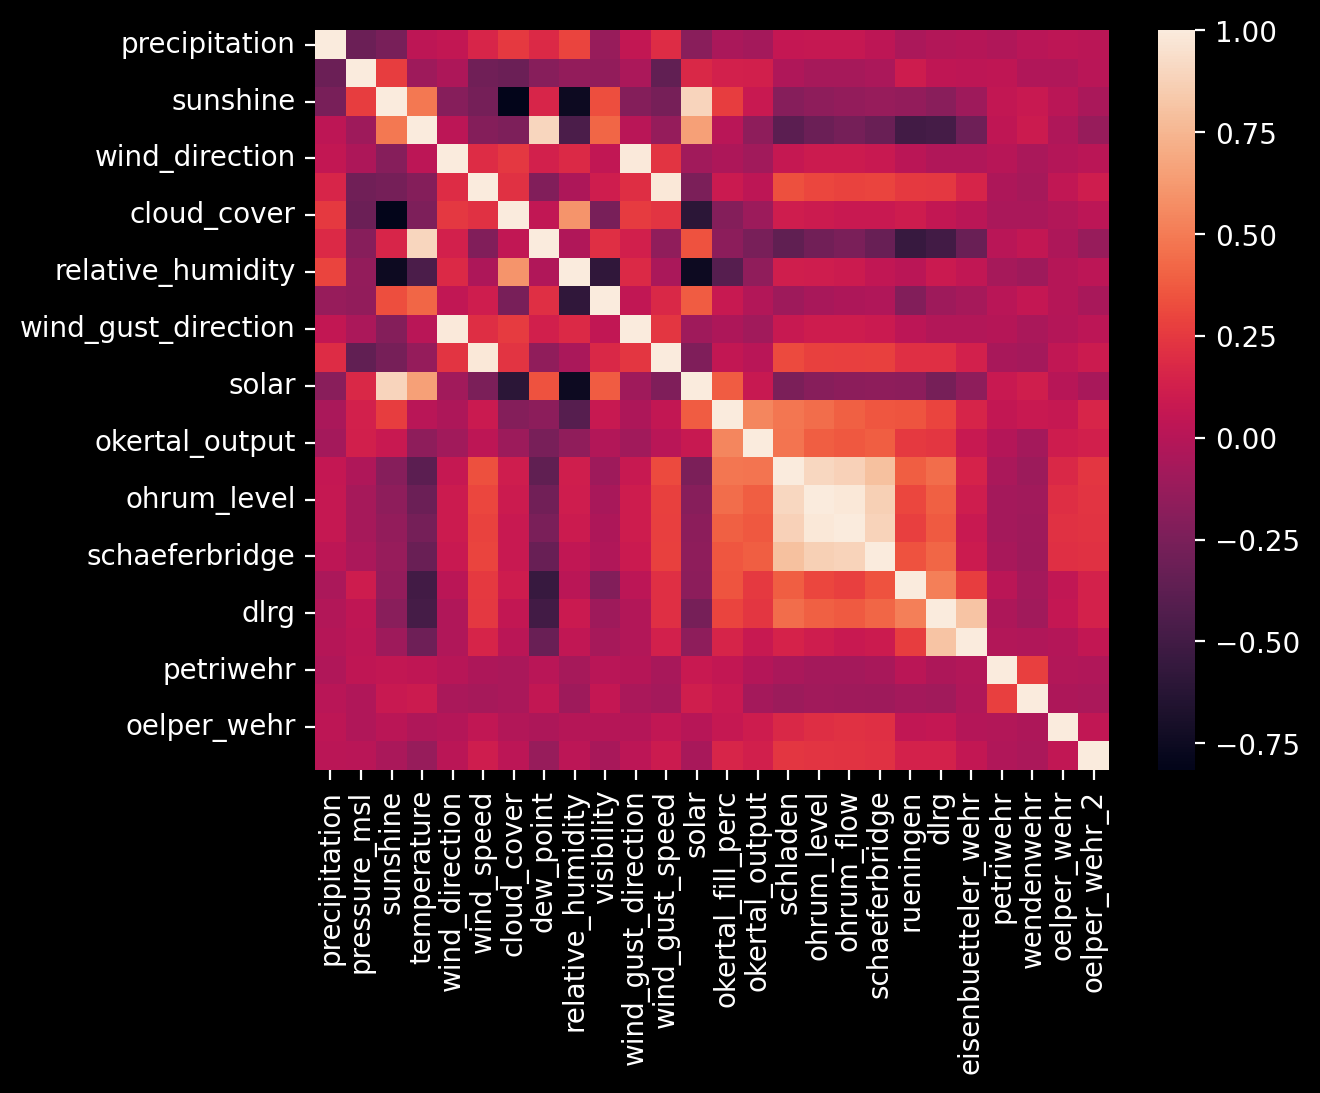

In [88]:
sns.heatmap(data_full.corr())

In [95]:
for col in all_measurements.columns:
	df_corr = data_full.corr()[[col]]
	df_corr = df_corr.drop(col)
	df_corr = df_corr.rename(columns={col: "correlation"})
	df_corr["absolute_correlation"] = abs(df_corr.correlation)
	print(col)
	print(df_corr.sort_values(by="absolute_correlation", ascending=False))
	print("\n")


okertal_fill_perc
                     correlation  absolute_correlation
okertal_output          0.544252              0.544252
schladen                0.480454              0.480454
ohrum_level             0.443119              0.443119
relative_humidity      -0.404081              0.404081
ohrum_flow              0.397411              0.397411
solar                   0.380441              0.380441
schaeferbridge          0.356403              0.356403
rueningen               0.353646              0.353646
dlrg                    0.295026              0.295026
sunshine                0.267876              0.267876
cloud_cover            -0.209009              0.209009
dew_point              -0.175916              0.175916
oelper_wehr_2           0.158720              0.158720
eisenbuetteler_wehr     0.149457              0.149457
pressure_msl            0.133004              0.133004
wind_speed              0.088239              0.088239
wendenwehr              0.084733              0

## Okertalsperre Füll (%)

In [196]:
Okertalsperre_1 = data_full.loc[
	:, weather_data.columns.to_list() + [("Okertalsperre", "Füll (%)")]
].corr()[[("Okertalsperre", "Füll (%)")]]
Okertalsperre_1 = Okertalsperre_1.iloc[:-1]
Okertalsperre_1 = Okertalsperre_1.rename(
	columns={("Okertalsperre", "Füll (%)"): "correlation"}
)
Okertalsperre_1.loc[:, "absolute_correlation"] = abs(Okertalsperre_1["correlation"])
Okertalsperre_1.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
relative_humidity,-0.307147,0.307147
solar,0.275294,0.275294
dew_point,-0.187220,0.187220
sunshine,0.182254,0.182254
cloud_cover,-0.161378,0.161378
wind_speed,0.139278,0.139278
wind_gust_speed,0.110452,0.110452
pressure_msl,0.079660,0.079660
visibility,0.062867,0.062867
temperature,-0.039715,0.039715


## Okertalsperre Abg. (m³/s)

In [197]:
Okertalsperre_2 = data_full.loc[
	:, weather_data.columns.to_list() + [("Okertalsperre", "Abg. (m³/s)")]
].corr()[[("Okertalsperre", "Abg. (m³/s)")]]
Okertalsperre_2 = Okertalsperre_2.iloc[:-1]
Okertalsperre_2 = Okertalsperre_2.rename(
	columns={("Okertalsperre", "Abg. (m³/s)"): "correlation"}
)
Okertalsperre_2.loc[:, "absolute_correlation"] = abs(Okertalsperre_2["correlation"])
Okertalsperre_2.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
wind_gust_speed,0.139585,0.139585
wind_speed,0.139512,0.139512
solar,-0.102075,0.102075
precipitation,0.095711,0.095711
sunshine,-0.084491,0.084491
temperature,-0.080577,0.080577
dew_point,-0.066391,0.066391
pressure_msl,-0.053220,0.053220
relative_humidity,0.047539,0.047539
wind_direction,0.044363,0.044363


## Eisenbüttler Wehr

In [209]:
eisenbuetteler = data_full.loc[
	:,
	weather_data.columns.to_list()
	+ [
		("Okertalsperre", "Füll (%)"),
		("Okertalsperre", "Abg. (m³/s)"),
		("Eisenbütteler Wehr", "OW"),
	],
].corr()[[("Eisenbütteler Wehr", "OW")]]
eisenbuetteler = eisenbuetteler.iloc[:-1]
eisenbuetteler = eisenbuetteler.rename(
	columns={("Eisenbütteler Wehr", "OW"): "correlation"}
)
eisenbuetteler.loc[:, "absolute_correlation"] = abs(eisenbuetteler["correlation"])
eisenbuetteler.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
dew_point,-0.287536,0.287536
temperature,-0.286515,0.286515
solar,-0.181927,0.181927
wind_speed,0.131716,0.131716
"(Okertalsperre, Füll (%))",0.126241,0.126241
sunshine,-0.126130,0.126130
wind_gust_speed,0.117962,0.117962
relative_humidity,0.078814,0.078814
visibility,-0.064173,0.064173
cloud_cover,0.053507,0.053507


## Petriwehr

In [204]:
petriwehr = data_full.loc[
	:, weather_data.columns.to_list() + [("Petriwehr", "OW")]
].corr()[[("Petriwehr", "OW")]]
petriwehr = petriwehr.iloc[:-1]
petriwehr = petriwehr.rename(columns={("Petriwehr", "OW"): "correlation"})
petriwehr.loc[:, "absolute_correlation"] = abs(petriwehr["correlation"])
petriwehr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
solar,0.084162,0.084162
relative_humidity,-0.068995,0.068995
sunshine,0.059843,0.059843
wind_gust_speed,-0.054871,0.054871
cloud_cover,-0.052773,0.052773
precipitation,-0.046551,0.046551
temperature,0.045520,0.045520
pressure_msl,0.044493,0.044493
wind_speed,-0.040543,0.040543
dew_point,0.017031,0.017031


## Wendenwehr

In [205]:
wendenwehr = data_full.loc[
	:, weather_data.columns.to_list() + [("Wendenwehr", "OW")]
].corr()[[("Wendenwehr", "OW")]]
wendenwehr = wendenwehr.iloc[:-1]
wendenwehr = wendenwehr.rename(columns={("Wendenwehr", "OW"): "correlation"})
wendenwehr.loc[:, "absolute_correlation"] = abs(wendenwehr["correlation"])
wendenwehr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
solar,0.130049,0.130049
relative_humidity,-0.100353,0.100353
temperature,0.099074,0.099074
sunshine,0.097678,0.097678
wind_gust_speed,-0.096904,0.096904
wind_speed,-0.090553,0.090553
wind_gust_direction,-0.063882,0.063882
wind_direction,-0.060844,0.060844
dew_point,0.059736,0.059736
cloud_cover,-0.046659,0.046659


## Tel(?)

In [206]:
tel = data_full.loc[:, weather_data.columns.to_list() + [("Tel.: 2511", "HKW")]].corr()[
	[("Tel.: 2511", "HKW")]
]
tel = tel.iloc[:-1]
tel = tel.rename(columns={("Tel.: 2511", "HKW"): "correlation"})
tel.loc[:, "absolute_correlation"] = abs(tel["correlation"])
tel.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
sunshine,-0.060605,0.060605
cloud_cover,0.060483,0.060483
relative_humidity,0.059923,0.059923
temperature,-0.059705,0.059705
wind_speed,0.052315,0.052315
solar,-0.052267,0.052267
wind_gust_speed,0.050707,0.050707
wind_gust_direction,0.043620,0.043620
wind_direction,0.040860,0.040860
dew_point,-0.031300,0.031300


## Ölper Wehr OW

In [207]:
ölper1 = data_full.loc[
	:, weather_data.columns.to_list() + [("Ölper Wehr", "OW")]
].corr()[[("Ölper Wehr", "OW")]]
ölper1 = ölper1.iloc[:-1]
ölper1 = ölper1.rename(columns={("Ölper Wehr", "OW"): "correlation"})
ölper1.loc[:, "absolute_correlation"] = abs(ölper1["correlation"])
ölper1.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
wind_gust_speed,0.086702,0.086702
precipitation,0.084820,0.084820
wind_speed,0.083581,0.083581
temperature,-0.054486,0.054486
pressure_msl,-0.046406,0.046406
solar,-0.044988,0.044988
dew_point,-0.043942,0.043942
relative_humidity,0.038375,0.038375
sunshine,-0.025773,0.025773
wind_direction,0.011566,0.011566


## Ölper Wehr Veltenhof

In [208]:
ölper2 = data_full.loc[
	:, weather_data.columns.to_list() + [("Ölper Wehr", "Veltenhof")]
].corr()[[("Ölper Wehr", "Veltenhof")]]
ölper2 = ölper2.iloc[:-1]
ölper2 = ölper2.rename(columns={("Ölper Wehr", "Veltenhof"): "correlation"})
ölper2.loc[:, "absolute_correlation"] = abs(ölper2["correlation"])
ölper2.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
temperature,-0.153629,0.153629
dew_point,-0.143681,0.143681
wind_speed,0.133771,0.133771
wind_gust_speed,0.122399,0.122399
solar,-0.097308,0.097308
sunshine,-0.086296,0.086296
visibility,-0.065820,0.065820
relative_humidity,0.060631,0.060631
cloud_cover,0.040993,0.040993
precipitation,0.040072,0.040072


In [102]:
from waterlevels_oker.data import preprocess_brunswick_data

In [104]:
preprocess_brunswick_data()

/Users/tim/code/Projects/waterlevels_oker/waterlevels_oker/data.py:237: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  )


,schladen,ohrum_level,schaeferbridge,eisenbuetteler_wehr,petriwehr,wendenwehr
timestamp,,,,,,
2019-01-01,89.44,76.83,72.45,70.75,69.21,69.24
2019-01-02,89.45,76.90,72.51,70.75,69.27,69.27
2019-01-03,89.44,76.76,72.46,70.73,69.30,69.33
2019-01-04,89.44,76.73,72.43,70.75,69.20,69.22
2019-01-05,89.52,76.85,72.43,70.75,69.34,69.38
...,...,...,...,...,...,...
2023-12-27,91.57,79.87,75.22,71.06,69.04,68.75
2023-12-28,91.29,79.83,75.21,71.07,68.99,68.67
2023-12-29,91.24,79.75,75.15,70.72,68.72,68.42
